In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

import eom
import polaritons
import fft

logfname = 'log.txt'

4000


/Users/jroman/miniconda3/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


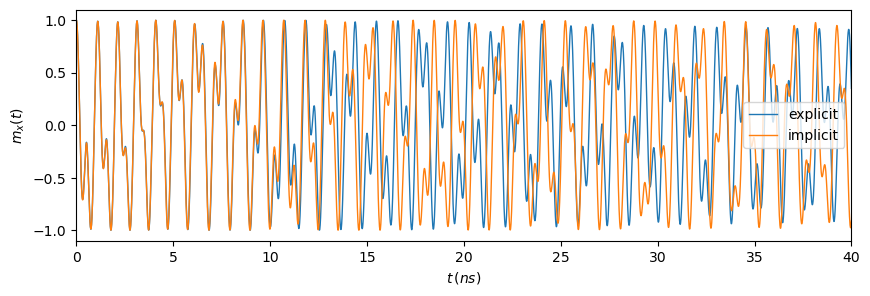

In [2]:
plt.rcParams["figure.figsize"] = (10, 3)

N = 100
tmax = 40e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 0
atol = 1e-8

with open(logfname, 'w') as logfile:
    eom.LLG_memory_2_log.S = 0
    eom.LLG_memory_2_log.C = 0
    eom.LLG_memory_2_log.last_t = 0.0
    eom.LLG_memory_2_log.dS = eom.LLG_memory_2_log.dC = eom.LLG_memory_2_log.dt = 0.0
    sol_imp = solve_ivp(
        eom.LLG_memory_2_log,
        (0, tmax),
        m0[:-2],
        args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:], logfile),
        t_eval=t_eval,
        max_step=dt,
        atol=atol,
        rtol=rtol
    )

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 40)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

4000


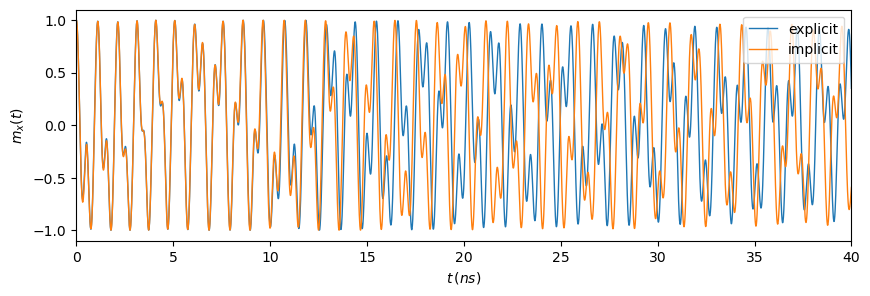

In [3]:
plt.rcParams["figure.figsize"] = (10, 3)

N = 100
tmax = 40e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 1
atol = 1

logfname = 'log.txt'

with open(logfname, 'w') as logfile:
    eom.LLG_memory_2_log.S = 0
    eom.LLG_memory_2_log.C = 0
    eom.LLG_memory_2_log.last_t = 0.0
    eom.LLG_memory_2_log.dS = eom.LLG_memory_2_log.dC = eom.LLG_memory_2_log.dt = 0.0
    sol_imp = solve_ivp(
        eom.LLG_memory_2_log,
        (0, tmax),
        m0[:-2],
        args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:], logfile),
        t_eval=t_eval,
        max_step=dt,
        atol=atol,
        rtol=rtol
    )

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 40)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

4000


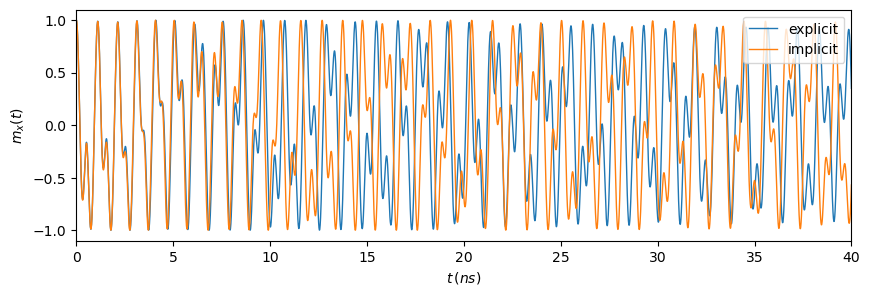

In [4]:
plt.rcParams["figure.figsize"] = (10, 3)

N = 100
tmax = 40e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 0
atol = 1e-8


eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 40)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

4000


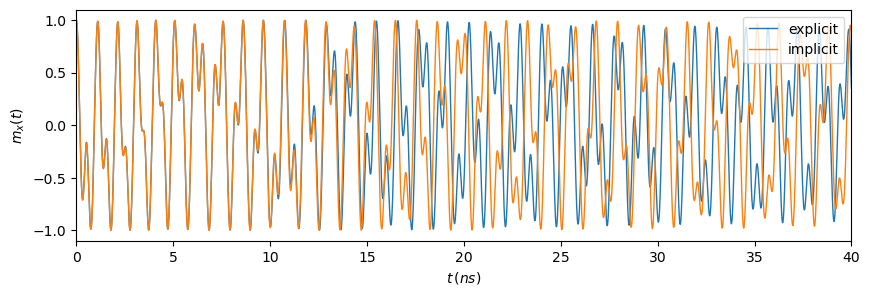

In [5]:
plt.rcParams["figure.figsize"] = (10, 3)

N = 100
tmax = 40e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 1
atol = 1


eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 40)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

2000


/Users/jroman/miniconda3/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


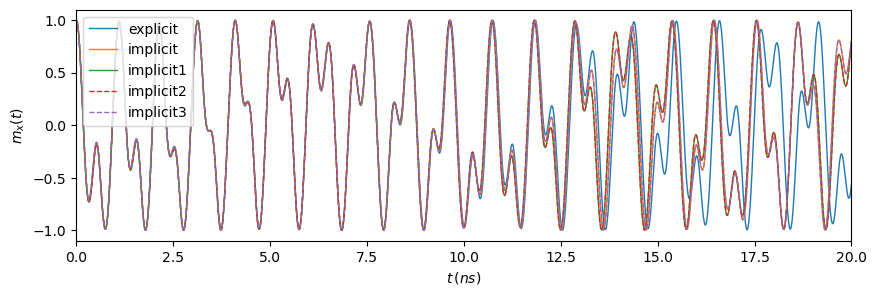

In [4]:
plt.rcParams["figure.figsize"] = (10, 3)

N = 100
tmax = 20e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 1
atol = 1

eom.LLG_memory_3.S = 0
eom.LLG_memory_3.C = 0
eom.LLG_memory_3.last_t = 0.0
eom.LLG_memory_3.cache_final_S = eom.LLG_memory_3.cache_final_C = 0.0
sol_imp3 = solve_ivp(
    eom.LLG_memory_3,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

with open(logfname, 'w') as logfile:
    eom.LLG_memory_2_log.S = 0
    eom.LLG_memory_2_log.C = 0
    eom.LLG_memory_2_log.last_t = 0.0
    eom.LLG_memory_2_log.dS = eom.LLG_memory_2_log.dC = eom.LLG_memory_2_log.dt = 0.0
    sol_imp2 = solve_ivp(
        eom.LLG_memory_2_log,
        (0, tmax),
        m0[:-2],
        args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:], logfile),
        t_eval=t_eval,
        max_step=dt,
        atol=atol,
        rtol=rtol
    )
    
eom.LLG_memory_1.S = 0
eom.LLG_memory_1.C = 0
eom.LLG_memory_1.last_t = 0.0
eom.LLG_memory_1.dS = eom.LLG_memory_1.dC = eom.LLG_memory_1.dt = 0.0
sol_imp1 = solve_ivp(
    eom.LLG_memory_1,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)
plt.plot(sol_imp1.t * 1e9, sol_imp1.y[0], label='LLG_memory_1', lw=1)
plt.plot(sol_imp2.t * 1e9, sol_imp2.y[0], label='LLG_memory_2', lw=1, ls='dashed')
plt.plot(sol_imp3.t * 1e9, sol_imp3.y[0], label='LLG_memory_3', lw=1, ls='dashed')

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 20)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

# Free time step (max error)

20000


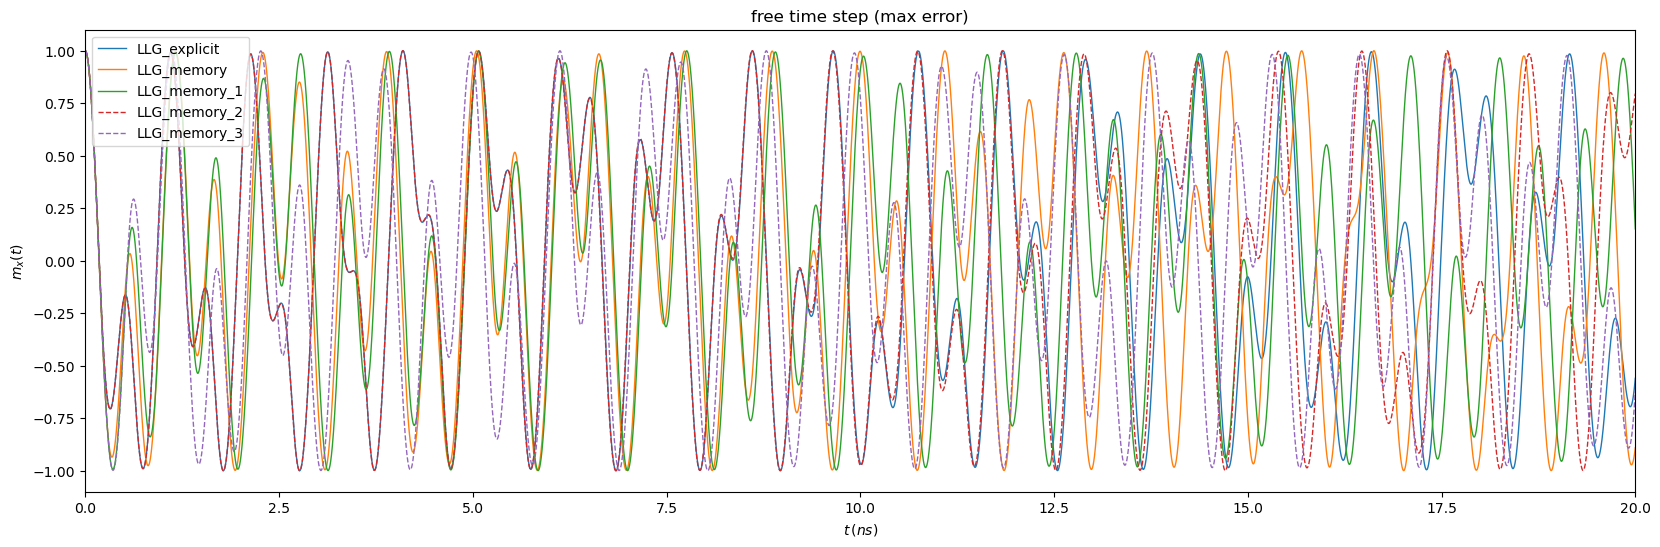

In [31]:
plt.rcParams["figure.figsize"] = (20, 6)

N = 100
tmax = 20e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.001e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 0
atol = 1e-10

eom.LLG_memory_3.S = 0
eom.LLG_memory_3.C = 0
eom.LLG_memory_3.last_t = 0.0
eom.LLG_memory_3.cache_final_S = eom.LLG_memory_3.cache_final_C = 0.0
sol_imp3 = solve_ivp(
    eom.LLG_memory_3,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

with open(logfname, 'w') as logfile:
    eom.LLG_memory_2_log.S = 0
    eom.LLG_memory_2_log.C = 0
    eom.LLG_memory_2_log.last_t = 0.0
    eom.LLG_memory_2_log.dS = eom.LLG_memory_2_log.dC = eom.LLG_memory_2_log.dt = 0.0
    sol_imp2 = solve_ivp(
        eom.LLG_memory_2_log,
        (0, tmax),
        m0[:-2],
        args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:], logfile),
        t_eval=t_eval,
        # max_step=dt,
        atol=atol,
        rtol=rtol
    )
    
eom.LLG_memory_1.S = 0
eom.LLG_memory_1.C = 0
eom.LLG_memory_1.last_t = 0.0
eom.LLG_memory_1.dS = eom.LLG_memory_1.dC = eom.LLG_memory_1.dt = 0.0
sol_imp1 = solve_ivp(
    eom.LLG_memory_1,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)
plt.plot(sol_imp1.t * 1e9, sol_imp1.y[0], label='LLG_memory_1', lw=1)
plt.plot(sol_imp2.t * 1e9, sol_imp2.y[0], label='LLG_memory_2', lw=1, ls='dashed')
plt.plot(sol_imp3.t * 1e9, sol_imp3.y[0], label='LLG_memory_3', lw=1, ls='dashed')

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 20)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.title('free time step (max error)')
plt.show()

# Fixed timestep

2000


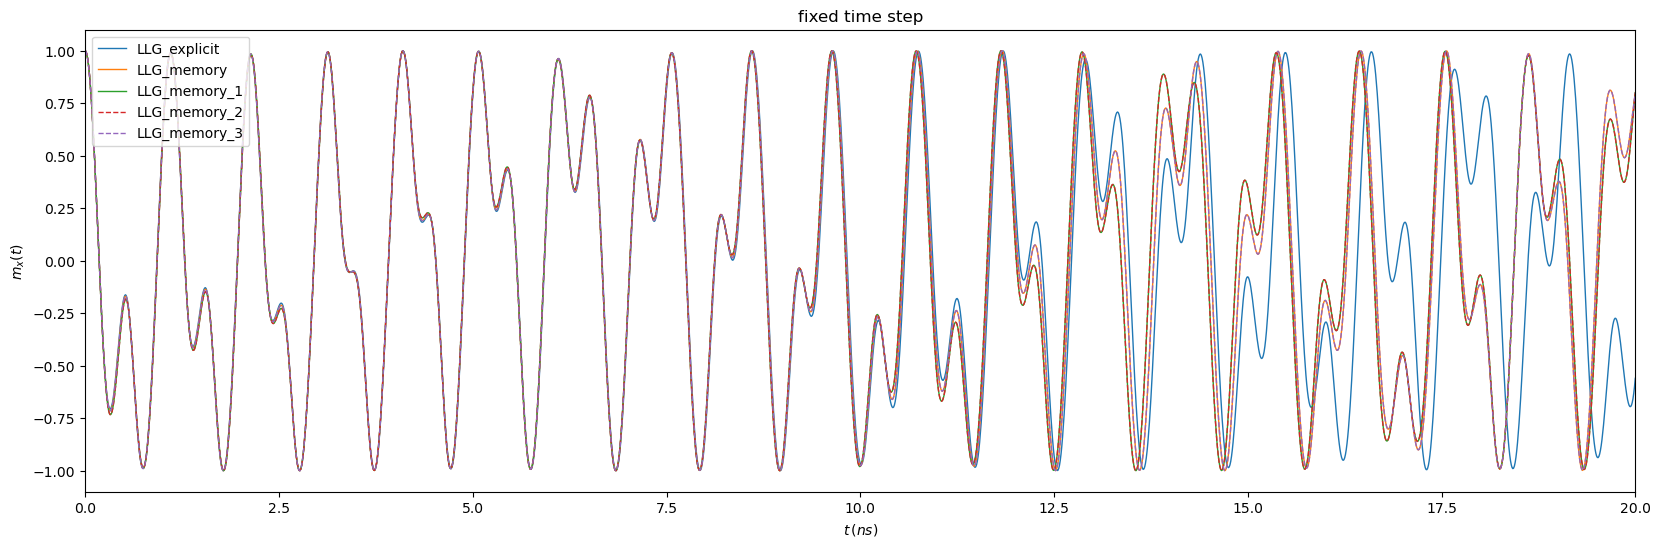

In [27]:
plt.rcParams["figure.figsize"] = (20, 6)

N = 100
tmax = 20e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 1
atol = 1

eom.LLG_memory_3.S = 0
eom.LLG_memory_3.C = 0
eom.LLG_memory_3.last_t = 0.0
eom.LLG_memory_3.cache_final_S = eom.LLG_memory_3.cache_final_C = 0.0
sol_imp3 = solve_ivp(
    eom.LLG_memory_3,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

with open(logfname, 'w') as logfile:
    eom.LLG_memory_2_log.S = 0
    eom.LLG_memory_2_log.C = 0
    eom.LLG_memory_2_log.last_t = 0.0
    eom.LLG_memory_2_log.dS = eom.LLG_memory_2_log.dC = eom.LLG_memory_2_log.dt = 0.0
    sol_imp2 = solve_ivp(
        eom.LLG_memory_2_log,
        (0, tmax),
        m0[:-2],
        args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:], logfile),
        t_eval=t_eval,
        max_step=dt,
        atol=atol,
        rtol=rtol
    )
    
eom.LLG_memory_1.S = 0
eom.LLG_memory_1.C = 0
eom.LLG_memory_1.last_t = 0.0
eom.LLG_memory_1.dS = eom.LLG_memory_1.dC = eom.LLG_memory_1.dt = 0.0
sol_imp1 = solve_ivp(
    eom.LLG_memory_1,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)
plt.plot(sol_imp1.t * 1e9, sol_imp1.y[0], label='LLG_memory_1', lw=1)
plt.plot(sol_imp2.t * 1e9, sol_imp2.y[0], label='LLG_memory_2', lw=1, ls='dashed')
plt.plot(sol_imp3.t * 1e9, sol_imp3.y[0], label='LLG_memory_3', lw=1, ls='dashed')

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 20)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.title('fixed time step')
plt.show()

# Max time step and max error

2000


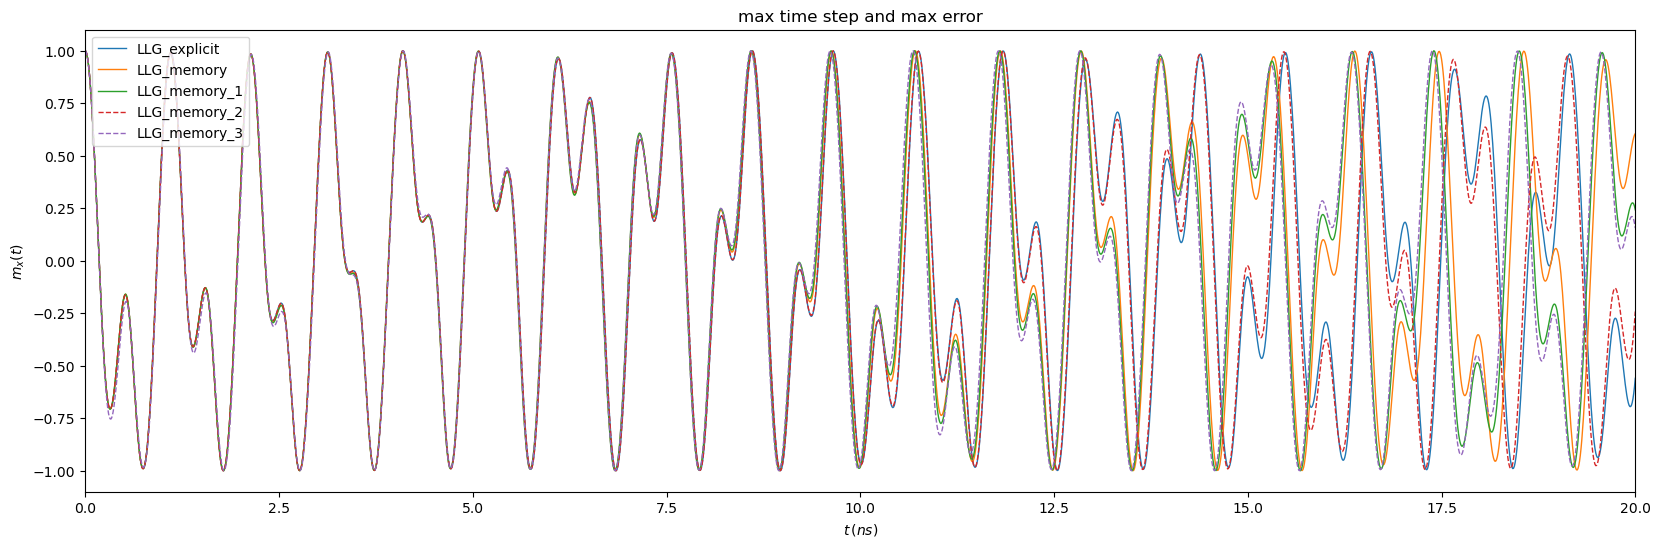

In [28]:
plt.rcParams["figure.figsize"] = (20, 6)

N = 100
tmax = 20e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 0
atol = 1e-12

eom.LLG_memory_3.S = 0
eom.LLG_memory_3.C = 0
eom.LLG_memory_3.last_t = 0.0
eom.LLG_memory_3.cache_final_S = eom.LLG_memory_3.cache_final_C = 0.0
sol_imp3 = solve_ivp(
    eom.LLG_memory_3,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

with open(logfname, 'w') as logfile:
    eom.LLG_memory_2_log.S = 0
    eom.LLG_memory_2_log.C = 0
    eom.LLG_memory_2_log.last_t = 0.0
    eom.LLG_memory_2_log.dS = eom.LLG_memory_2_log.dC = eom.LLG_memory_2_log.dt = 0.0
    sol_imp2 = solve_ivp(
        eom.LLG_memory_2_log,
        (0, tmax),
        m0[:-2],
        args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:], logfile),
        t_eval=t_eval,
        max_step=dt,
        atol=atol,
        rtol=rtol
    )
    
eom.LLG_memory_1.S = 0
eom.LLG_memory_1.C = 0
eom.LLG_memory_1.last_t = 0.0
eom.LLG_memory_1.dS = eom.LLG_memory_1.dC = eom.LLG_memory_1.dt = 0.0
sol_imp1 = solve_ivp(
    eom.LLG_memory_1,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)
plt.plot(sol_imp1.t * 1e9, sol_imp1.y[0], label='LLG_memory_1', lw=1)
plt.plot(sol_imp2.t * 1e9, sol_imp2.y[0], label='LLG_memory_2', lw=1, ls='dashed')
plt.plot(sol_imp3.t * 1e9, sol_imp3.y[0], label='LLG_memory_3', lw=1, ls='dashed')

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 20)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.title('max time step and max error')
plt.show()

# Comparison speed and accuracy fixed timestep vs max error

2000


/Users/jroman/miniconda3/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


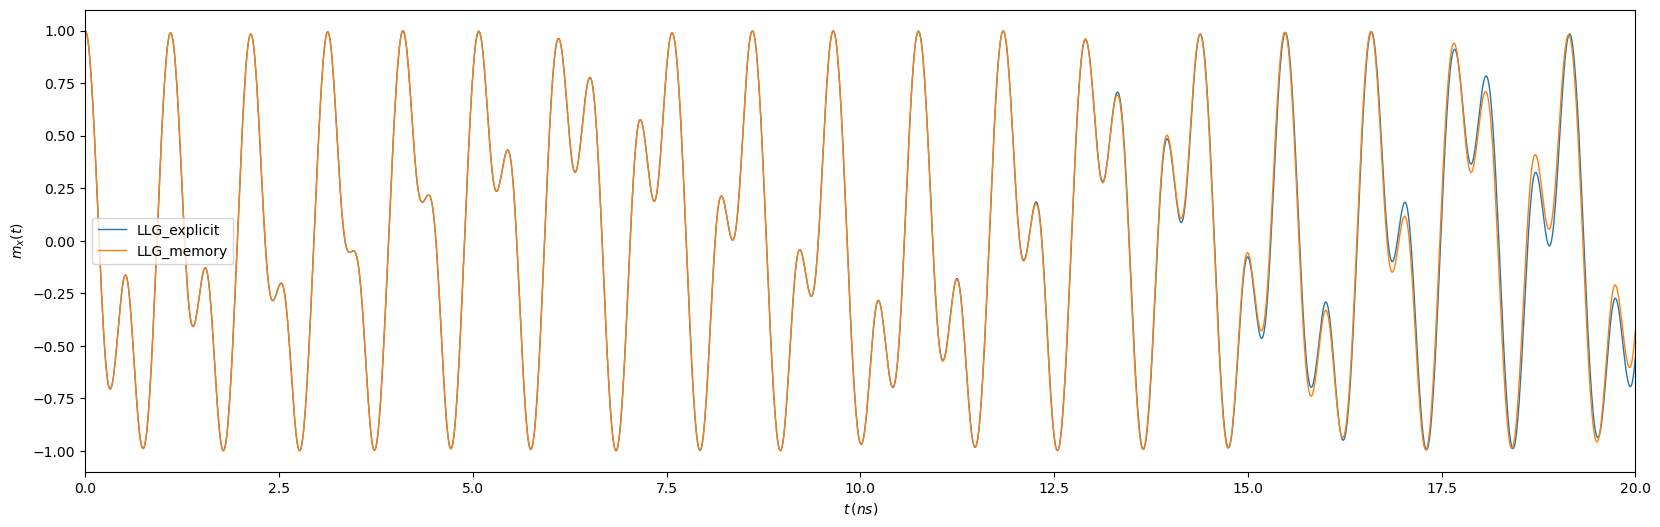

In [32]:
plt.rcParams["figure.figsize"] = (20, 6)

N = 100
tmax = 20e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 1
atol = 1
max_step = 0.001e-9

eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=max_step,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)
if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 20)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

2000


/Users/jroman/miniconda3/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


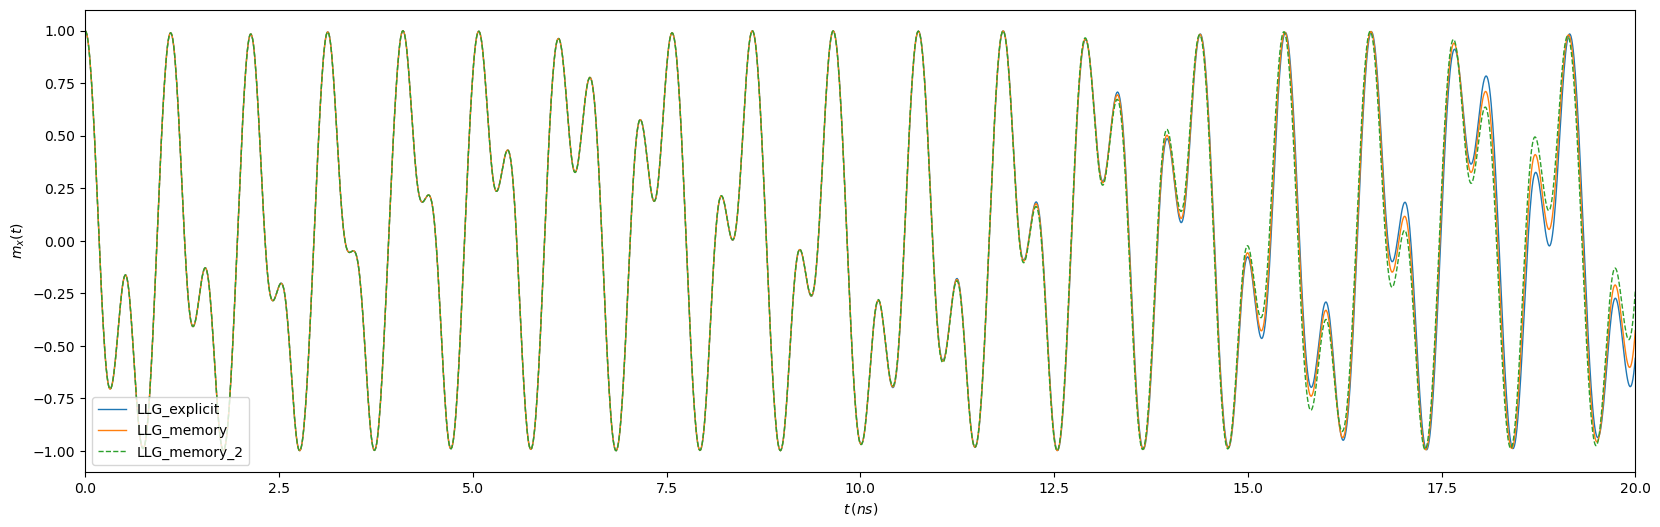

In [35]:
plt.rcParams["figure.figsize"] = (20, 6)

N = 100
tmax = 20e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 0
atol = 1e-12

eom.LLG_memory_2.S = 0
eom.LLG_memory_2.C = 0
eom.LLG_memory_2.last_t = 0.0
eom.LLG_memory_2.dS = eom.LLG_memory_2.dC = eom.LLG_memory_2.dt = 0.0
sol_imp2 = solve_ivp(
    eom.LLG_memory_2,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)
plt.plot(sol_imp2.t * 1e9, sol_imp2.y[0], label='LLG_memory_2', lw=1, ls='dashed')

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 20)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend(loc='lower left')
plt.show()

# Comparison of speed and accuracy with explicit

40000


/Users/jroman/miniconda3/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


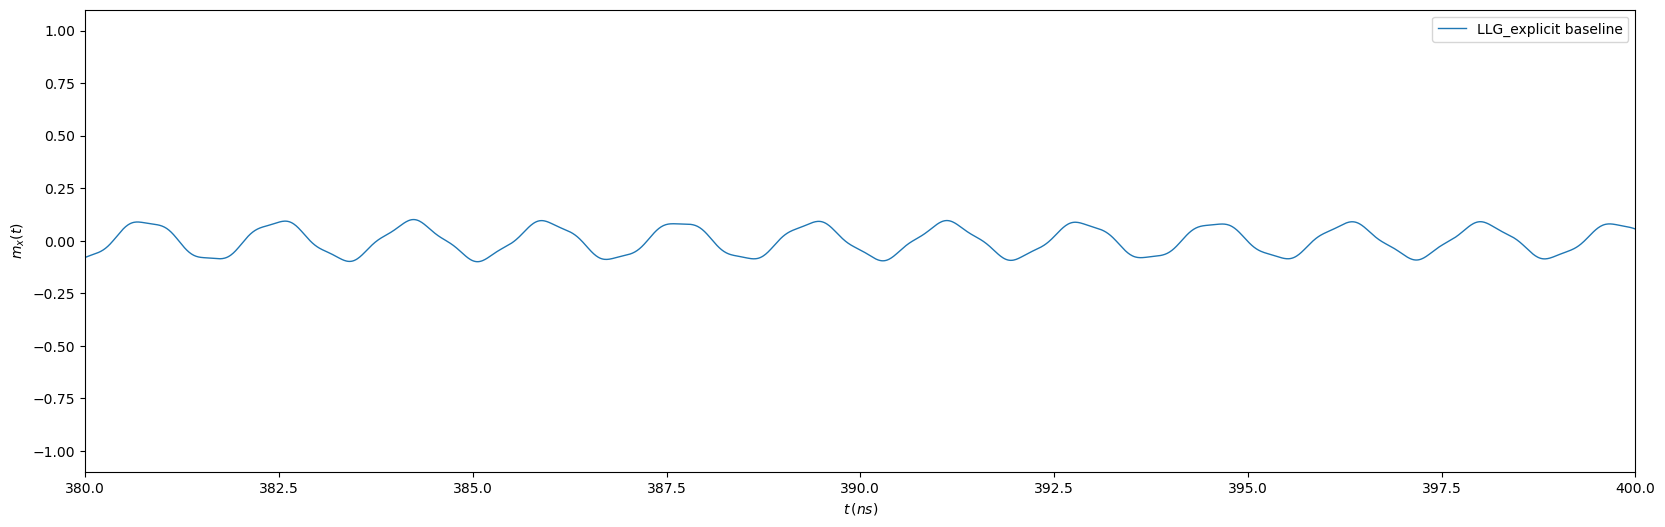

In [41]:
plt.rcParams["figure.figsize"] = (20, 6)

N = 100
tmax = 400e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))

rtol = 0
atol = 1e-18
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit baseline', lw=1)
if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(380, 400)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

40000


/Users/jroman/miniconda3/lib/python3.10/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: At least one element of `rtol` is too small. Setting `rtol = np.maximum(rtol, 2.220446049250313e-14)`.
  warn("At least one element of `rtol` is too small. "


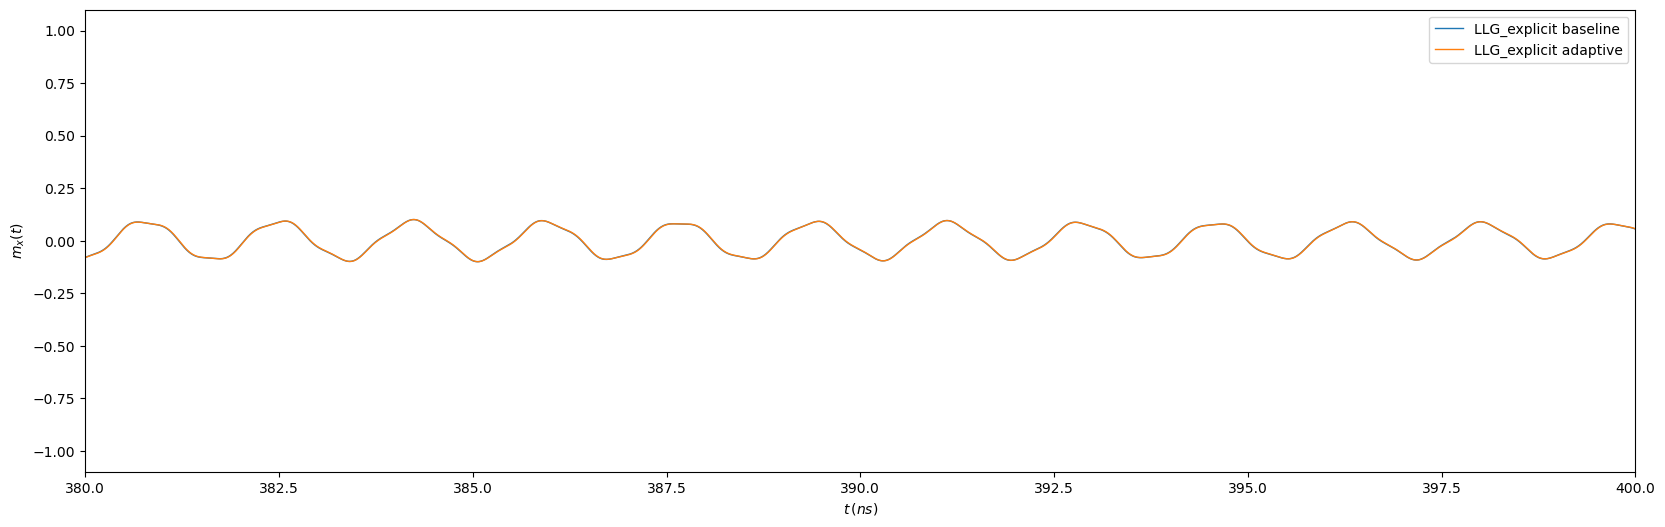

In [50]:
plt.rcParams["figure.figsize"] = (20, 6)

N = 100
tmax = 400e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))

rtol = 0
atol = 1e-8
sol_exp_adapt = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit baseline', lw=1)
plt.plot(sol_exp_adapt.t * 1e9, sol_exp_adapt.y[0], label='LLG_explicit adaptive', lw=1)
if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(380, 400)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

40000


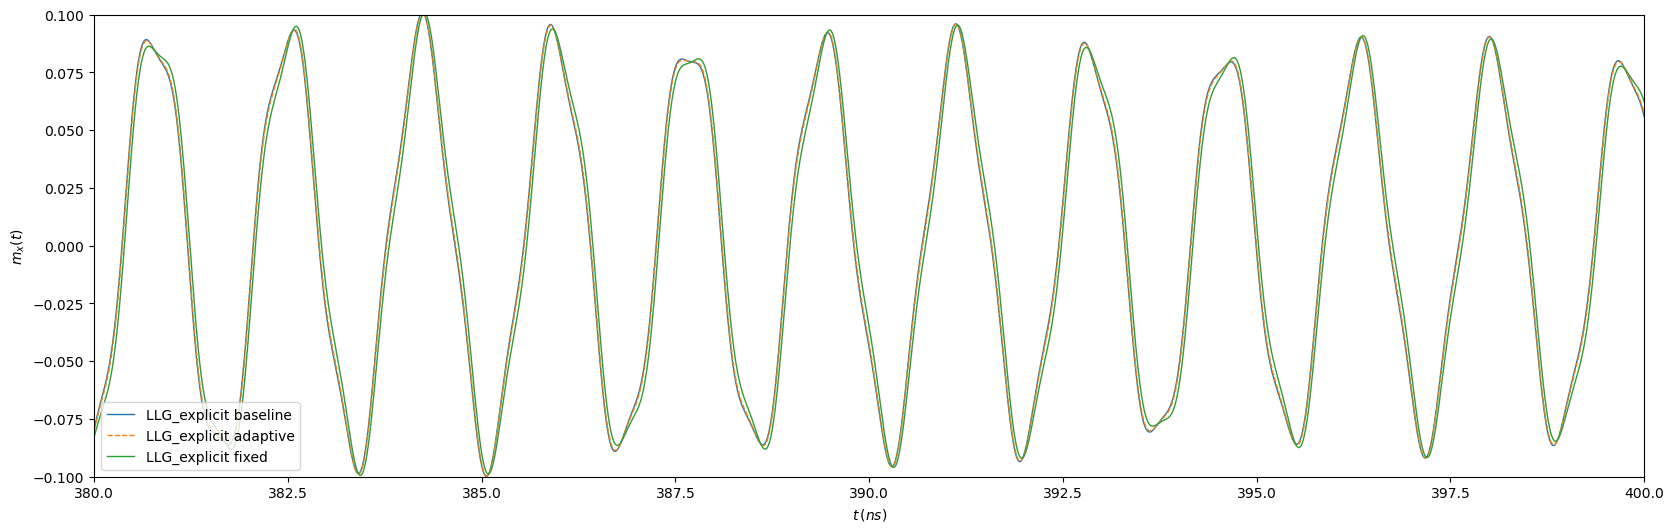

In [56]:
plt.rcParams["figure.figsize"] = (20, 6)

N = 100
tmax = 400e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.01e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))

rtol = 1
atol = 1
max_step = 0.009e-9
sol_exp_fixed = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    max_step=max_step,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit baseline', lw=1)
plt.plot(sol_exp_adapt.t * 1e9, sol_exp_adapt.y[0], label='LLG_explicit adaptive', lw=1, ls='dashed')
plt.plot(sol_exp_fixed.t * 1e9, sol_exp_fixed.y[0], label='LLG_explicit fixed', lw=1)
if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(380, 400)
plt.ylim(-0.1, 0.1)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend(loc='lower left')
plt.show()

20000


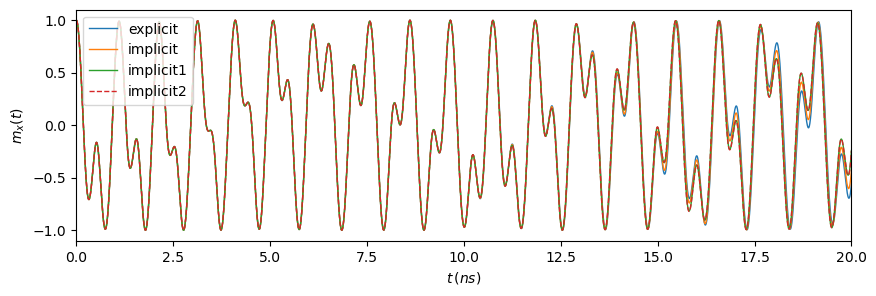

In [19]:
plt.rcParams["figure.figsize"] = (10, 3)

N = 100
tmax = 20e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.001e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 1
atol = 1

with open(logfname, 'w') as logfile:
    eom.LLG_memory_2_log.S = 0
    eom.LLG_memory_2_log.C = 0
    eom.LLG_memory_2_log.last_t = 0.0
    eom.LLG_memory_2_log.dS = eom.LLG_memory_2_log.dC = eom.LLG_memory_2_log.dt = 0.0
    sol_imp2 = solve_ivp(
        eom.LLG_memory_2_log,
        (0, tmax),
        m0[:-2],
        args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:], logfile),
        t_eval=t_eval,
        max_step=dt,
        atol=atol,
        rtol=rtol
    )
    
eom.LLG_memory_1.S = 0
eom.LLG_memory_1.C = 0
eom.LLG_memory_1.last_t = 0.0
eom.LLG_memory_1.dS = eom.LLG_memory_1.dC = eom.LLG_memory_1.dt = 0.0
sol_imp1 = solve_ivp(
    eom.LLG_memory_1,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-10
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)
plt.plot(sol_imp1.t * 1e9, sol_imp1.y[0], label='LLG_memory_1', lw=1)
plt.plot(sol_imp2.t * 1e9, sol_imp2.y[0], label='LLG_memory_2', lw=1, ls='dashed')

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 20)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()

20000


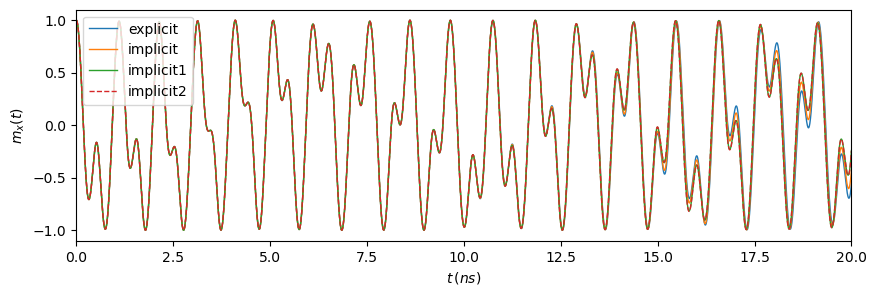

In [7]:
plt.rcParams["figure.figsize"] = (10, 3)

N = 100
tmax = 20e-9  # 1000
alpha = 1e-3
my0 = 0.01
# m0 = np.array([0, my0, np.sqrt(1 - my0**2), 0, 0])
m0 = np.array([np.sqrt(1 - my0**2), my0, 0, 0, 0])
alpha0 = 0.5 * (m0[3] - 1j * m0[4])  # fijo alpha0 a partir de x0 y p0
gammaLL = 28e9 * 2 * np.pi
wc = 1.4e9
wz = 1 * wc
kappa = 1e-3 * wc
Bext = np.array([0, 0, 2 * np.pi * wz / gammaLL])
lam = 0.415 * wc
Brms = 4 * np.pi * lam / (np.sqrt(N) * gammaLL)
Brms = np.array([Brms, 0, 0])

lamc = 0.5 * np.sqrt(wc * wz)

dt = 0.001e-9
t_eval = np.linspace(0, tmax, int(tmax // dt) + 1)  # 100000
print(int(tmax // dt))
rtol = 1
atol = 1

with open(logfname, 'w') as logfile:
    eom.LLG_memory_2_log.S = 0
    eom.LLG_memory_2_log.C = 0
    eom.LLG_memory_2_log.last_t = 0.0
    eom.LLG_memory_2_log.dS = eom.LLG_memory_2_log.dC = eom.LLG_memory_2_log.dt = 0.0
    sol_imp2 = solve_ivp(
        eom.LLG_memory_2_log,
        (0, tmax),
        m0[:-2],
        args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:], logfile),
        t_eval=t_eval,
        max_step=dt,
        atol=atol,
        rtol=rtol
    )
    
eom.LLG_memory_1.S = 0
eom.LLG_memory_1.C = 0
eom.LLG_memory_1.last_t = 0.0
eom.LLG_memory_1.dS = eom.LLG_memory_1.dC = eom.LLG_memory_1.dt = 0.0
sol_imp1 = solve_ivp(
    eom.LLG_memory_1,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

eom.LLG_memory.S = 0
eom.LLG_memory.C = 0
eom.LLG_memory.last_t = 0.0
sol_imp = solve_ivp(
    eom.LLG_memory,
    (0, tmax),
    m0[:-2],
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha, m0[-2:]),
    t_eval=t_eval,
    max_step=dt,
    atol=atol,
    rtol=rtol
)

rtol = 0
atol = 1e-8
sol_exp = solve_ivp(
    eom.LLG_explicit,
    (0, tmax),
    m0,
    args=(Bext, Brms, 2 * np.pi * wc, 2 * np.pi * kappa, N, gammaLL, alpha),
    t_eval=t_eval,
    # max_step=dt,
    atol=atol,
    rtol=rtol
)

plt.plot(sol_exp.t * 1e9, sol_exp.y[0], label='LLG_explicit', lw=1)
plt.plot(sol_imp.t * 1e9, sol_imp.y[0], label='LLG_memory', lw=1)
plt.plot(sol_imp1.t * 1e9, sol_imp1.y[0], label='LLG_memory_1', lw=1)
plt.plot(sol_imp2.t * 1e9, sol_imp2.y[0], label='LLG_memory_2', lw=1, ls='dashed')

if lam > lamc:
    plt.axhline(np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx
    plt.axhline(-np.sqrt(1 - (lamc / lam) ** 2), c="k", lw=0.5)  # stationary mx

plt.xlim(0, 20)
# plt.ylim(-0.1, 0.1)
plt.ylabel(r"$m_x(t)$")
plt.xlabel(r"$t \, (ns)$")
plt.legend()
plt.show()